In [76]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas
from helper_scripts import random_rm_trace_generator
import importlib
from matplotlib import pyplot as plt
from modules import umap_classifier

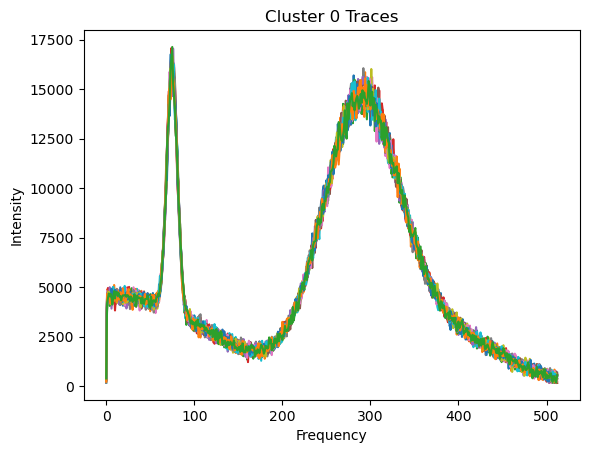

In [77]:
cluster_idx = 0
time_traces, spectra, phase, clusters, _,_=random_rm_trace_generator.generate_random_rm_traces(100, n_clusters=4, outlier_fraction=0.05)
for i in range(100):
    if clusters[i] == cluster_idx:
        plt.plot(spectra[i], label=f'Trace {i+1}')
        plt.xlabel('Frequency')
        plt.ylabel('Intensity')
plt.title(f'Cluster {cluster_idx} Traces')
plt.show()

In [78]:
importlib.reload(umap_classifier)
importlib.reload(random_rm_trace_generator)

<module 'helper_scripts.random_rm_trace_generator' from '/cr/work/kastner/private/umap/rm_classifier/tutorials/notebooks/helper_scripts/random_rm_trace_generator.py'>

In [79]:
u_clas = umap_classifier.UMAPClassifier(yaml_path="../yaml_files/umap_classifier_test.yaml", data_preparation={'target_data_type': "time"})

In [80]:
prepared_data=u_clas.prepare_data(time_traces, input_data_type="time",  data_preparation={'target_data_type': "fft"}, 
                 log_filter=False,avg_pooling=None,verbose=False,
                 normalization=False,
                 suppress_dc=True)

In [81]:
embeddings=u_clas.embed(prepared_data, save_model="umap_model.pkl")

Embedding data with parameters: n_neighbors=40, min_dist=0.0, n_components=2, metric=braycurtis


/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Saving UMAP model to umap_model.pkl


/cr/work/kastner/miniconda3/envs/aera01/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


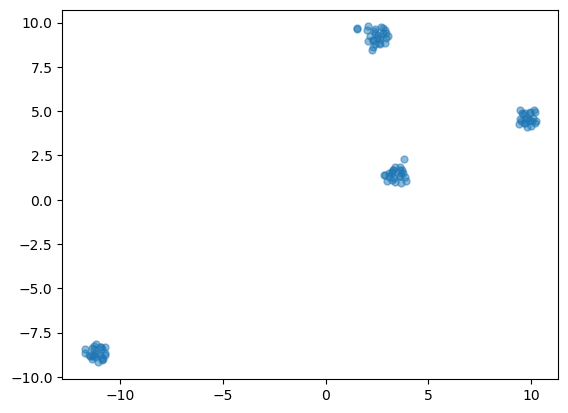

In [82]:
plt.plot(embeddings[:, 0], embeddings[:, 1], 'o', markersize=5, alpha=0.5)

In [83]:
clusters=u_clas.classify(embeddings, db_min_samples=10, db_eps=0.5)
u_clas.cluster_indices

Overriding db_min_samples with value 10 from kwargs.
Overriding db_eps with value 0.5 from kwargs.


array([-1,  0,  1,  2,  3])

In [84]:
def log(x):
    return np.log(x + 1e-10)

In [85]:
u_clas.save_modified_cluster_trace(prepared_data, clusters, log, trace_statistic="std")

Saved 5 cluster traces with std statistic.


In [86]:
u_clas.cluster_std_traces

array([[0.32244241, 0.31041675, 0.39394383, ..., 0.44988796, 0.82319026,
        0.86263028],
       [0.06256959, 0.0599601 , 0.06832338, ..., 0.55311469, 0.47930089,
        0.79769179],
       [0.29614293, 0.40056018, 0.36638494, ..., 0.09329378, 0.09713533,
        0.57356298],
       [0.1361657 , 0.14141063, 0.14828619, ..., 0.37819127, 0.31364025,
        1.32621349],
       [0.57687764, 0.55195865, 0.51994459, ..., 0.11481312, 0.11611194,
        0.68760493]])

In [87]:
func = np.log
func.__name__

'log'